## load_digits : 손글씨를 분류해 봅시다

In [1]:
import sklearn

print(sklearn.__version__)

1.0


## 1. 필요한 모듈 import하기

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2. 데이터 준비
load_digits 메서드를 사용합니다.

In [9]:
from sklearn.datasets import load_digits

digits = load_digits() # Dictionary 자료형과 유사한 sklearn.utils.Bunch 자료형 
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## 3. 데이터 이해하기
지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.
- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

In [10]:
digits_data = digits.data
digits_data.shape  # (손글씨 이미지의 개수, 이미지 당 Pixel 수)

(1797, 64)

In [11]:
digits_label = digits.target # 각 이미지가 나타내는 숫자를 의미합니다.
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

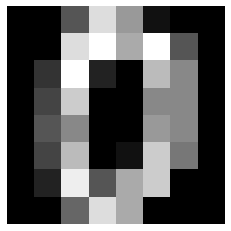

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
# 브라우저에서 바로 그림을 볼 수 있게 해주는 역할을 합니다 

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

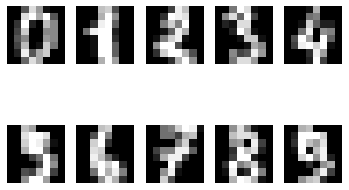

In [14]:
for i in range(10):
    plt.subplot(2, 5, i+1) # 10개의 이미지를 2행 5열로 표시
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') 
    # plt.imshow()는 (m,n) 형태의 데이터를 입력으로 받기 때문에
    # 데이터셋 내의 1열로 펼쳐진 64개의 데이터를 원래의 이미지 형태인 (8,8)로 복원
    # cmap은 해당 이미지의 색상을 지정(gray는 흑백으로 출력)
    plt.axis('off') # 축을 보이지 않게 해줍니다. 
plt.show()

In [15]:
digits_label = digits.target # 각 이미지가 나타내는 숫자를 의미합니다.
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
from collections import Counter

In [26]:
cnt_label = Counter(digits_label)
cnt_label

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

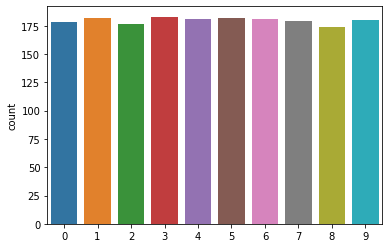

In [25]:
import seaborn as sns
sns.countplot(digits_label)

## 4. train, test 데이터 분리
모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

In [27]:
# train, test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

In [28]:
X_train.shape, y_train.shape
# train의 형상정보 확인

((1437, 64), (1437,))

In [29]:
X_test.shape, y_test.shape
# test의 형상정보 확인

((360, 64), (360,))

In [30]:
y_train, y_test
# label이 잘 분리되었는지 확인

(array([2, 2, 2, ..., 1, 3, 3]),
 array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
        0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
        6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
        7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
        3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
        6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
        3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
        6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
        8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
        8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
        8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
        8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
        3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
     

## 5. 다양한 모델로 학습시켜보기
학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

In [31]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train) 
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [32]:
# RandomForest 
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32) # RandomForest분류기 객체를 생성
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



In [33]:
# SVM
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [34]:
# SGD
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train) 
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.82      0.95      0.88        42
           2       0.97      0.97      0.97        40
           3       0.86      0.94      0.90        34
           4       0.97      0.97      0.97        37
           5       0.85      1.00      0.92        28
           6       0.96      0.93      0.95        28
           7       0.94      0.97      0.96        33
           8       1.00      0.70      0.82        43
           9       0.97      0.88      0.92        32

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 
logistic_model = LogisticRegression() 

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 6. 모델을 평가해 보기
학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

- 모델의 label이 꽤 균형적이므로 accuracy를 이용한다

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print('< Accuracy Score >')
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train) 
y_pred = decision_tree.predict(X_test)
print("decision_tree :", accuracy_score(y_test, y_pred))

random_forest = RandomForestClassifier(random_state=32) # RandomForest분류기 객체를 생성
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test)
print("random_forest :", accuracy_score(y_test, y_pred))

svm_model = svm.SVC() # 모델 객체를 만든다.
svm_model.fit(X_train, y_train) # 훈련
y_pred = svm_model.predict(X_test)
print("svm_model :", accuracy_score(y_test, y_pred))

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print("sgd_model  :", accuracy_score(y_test, y_pred))

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train) 
y_pred = logistic_model.predict(X_test)
print("logistic_model :", accuracy_score(y_test, y_pred))

< Accuracy Score >
decision_tree : 0.8555555555555555
random_forest : 0.9638888888888889
svm_model : 0.9888888888888889
sgd_model  : 0.9444444444444444
logistic_model : 0.9527777777777777


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
